In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
path = '/content/drive/My Drive/Colab Notebooks/moviedata2.json'
df = pd.read_json(path)
df = df[:5000]

In [0]:
df

,movie_genre,movie_name,movie_poster,movie_summary,movie_synopsis,movie_tagline
0,"[Adventure, Drama, Horror, Thriller]",47 Meters Down: Uncaged,www.imdb.com/title/tt7329656/mediaviewer/rm242...,[Four teen girls diving in a ruined underwater...,"[The film starts at a girls school in Yucatan,...","['\n', '\nThe Next Chapter', '\n']"
1,"[Drama, Fantasy, Horror]",It Chapter Two,www.imdb.com/title/tt7349950/mediaviewer/rm324...,[Twenty-seven years after their first encounte...,"[In 2016 Derry, Maine, a young gay man is beat...","['\n', ""\nYou'll Float Again"", '\n']"
2,"[Horror, Sci-Fi]",Alien,www.imdb.com/title/tt0078748/mediaviewer/rm299...,[After a space merchant vessel perceives an un...,[The opening credits appear in front of a larg...,"['\n', ""\nIt's Alien, the 8th passenger."", '\n']"
3,"[Horror, Mystery, Thriller]",The Conjuring 3,www.imdb.com/title/tt7069210/mediaviewer/rm175...,[],[],"['\n', '\n', '\xa0', '\n', '\xa0', '\n', '\n']"
4,"[Adventure, Drama, Fantasy]",The Lord of the Rings: The Fellowship of the R...,www.imdb.com/title/tt0120737/mediaviewer/rm359...,[A meek Hobbit from the Shire and eight compan...,"[The prologue, spoken by Galadriel, shows the ...","['\n', '\nAll we have to decide is what to do ..."
5,"[Crime, Drama, Thriller]",The Mule,www.imdb.com/title/tt7959026/mediaviewer/rm320...,[A 90-year-old horticulturist and Korean War v...,[This movie is based on a true story of a Worl...,"['\n', '\nNobody Runs Forever', '\n']"
6,"[Adventure, Family, Fantasy]",Harry Potter and the Sorcerer's Stone,www.imdb.com/title/tt0241527/mediaviewer/rm683...,[An orphaned boy enrolls in a school of wizard...,"[Lord Voldemort, an evil and powerful dark wiz...","['\n', '\nThe Magic Begins November 16th.', '\n']"
7,"[Comedy, Family, Fantasy]",Hocus Pocus,www.imdb.com/title/tt0107120/mediaviewer/rm354...,"[A curious youngster moves to Salem, where he ...","[Hocus Pocus begins in a small town in 1693, w...","['\n', ""\nIt's just a bunch of Hocus Pocus!""]"
8,"[Action, Adventure, Comedy, Fantasy]",Jumanji: Welcome to the Jungle,www.imdb.com/title/tt2283362/mediaviewer/rm193...,[Four teenagers are sucked into a magical vide...,"[In 1996, teenager Alex Vreeke (, ) receives t...","['\n', '\nLanding This Christmas.', '\n']"
9,"[Animation, Adventure, Comedy, Family]",Finding Nemo,www.imdb.com/title/tt0266543/mediaviewer/rm331...,[After his son is captured in the Great Barrie...,"[Two clownfish, Marlin (, ) and his wife Coral...","['\n', ""\n71% of the Earth's surface is covere..."


In [0]:
from __future__ import absolute_import, division, print_function

# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf

tf.enable_eager_execution()

from matplotlib import font_manager, rc

rc('font', family='AppleGothic') #for mac

import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

from pprint import pprint
import numpy as np
import os

import re
print(tf.__version__)

1.14.0


In [0]:
df.movie_genre = df.movie_genre.apply(lambda x: str(x))
df.head()

,movie_genre,movie_name,movie_poster,movie_summary,movie_synopsis,movie_tagline
0,"['Adventure', 'Drama', 'Horror', 'Thriller']",47 Meters Down: Uncaged,www.imdb.com/title/tt7329656/mediaviewer/rm242...,[Four teen girls diving in a ruined underwater...,"[The film starts at a girls school in Yucatan,...","['\n', '\nThe Next Chapter', '\n']"
1,"['Drama', 'Fantasy', 'Horror']",It Chapter Two,www.imdb.com/title/tt7349950/mediaviewer/rm324...,[Twenty-seven years after their first encounte...,"[In 2016 Derry, Maine, a young gay man is beat...","['\n', ""\nYou'll Float Again"", '\n']"
2,"['Horror', 'Sci-Fi']",Alien,www.imdb.com/title/tt0078748/mediaviewer/rm299...,[After a space merchant vessel perceives an un...,[The opening credits appear in front of a larg...,"['\n', ""\nIt's Alien, the 8th passenger."", '\n']"
3,"['Horror', 'Mystery', 'Thriller']",The Conjuring 3,www.imdb.com/title/tt7069210/mediaviewer/rm175...,[],[],"['\n', '\n', '\xa0', '\n', '\xa0', '\n', '\n']"
4,"['Adventure', 'Drama', 'Fantasy']",The Lord of the Rings: The Fellowship of the R...,www.imdb.com/title/tt0120737/mediaviewer/rm359...,[A meek Hobbit from the Shire and eight compan...,"[The prologue, spoken by Galadriel, shows the ...","['\n', '\nAll we have to decide is what to do ..."


In [0]:
df.movie_name = df.movie_name.apply(lambda x: x.replace('혻',''))

In [0]:
df.movie_summary = df.movie_summary.apply(lambda x: str(x))
df.movie_summary = df.movie_summary.apply(lambda x: re.sub("[^A-Za-z. 0-9]", '', x))
df.movie_synopsis = df.movie_synopsis.apply(lambda x : str(x))
df.movie_synopsis = df.movie_synopsis.apply(lambda x : re.sub('[^A-Za-z. 0-9]', '', x))
df.movie_tagline = df.movie_tagline.apply(lambda x: str(x))
tl = list(df["movie_tagline"])
tl = [" ".join([ j for j in eval(i) if j != "\n"]).strip() for i in tl]
df.movie_tagline = tl
summ = list(df["movie_summary"])

In [0]:
tl = list(df["movie_tagline"])
tl = [" ".join([ j for j in eval(i) if j != "\n"]).strip() for i in tl]

SyntaxError: ignored

In [0]:
df.movie_tagline = tl
summ = list(df["movie_summary"])

In [0]:

sources = [i.split() for i in df['movie_summary']]
targets = [i.split() for i in df['movie_tagline']]

In [0]:
r1 = re.compile(r"[^A-Za-z]")
ts_vocab = [r1.sub("",j).lower() for i in sources for j in i ]
# s_vocab = list(set(sum(sources, [])))
s_vocab = list(set(ts_vocab))
s_vocab.sort()
s_vocab.pop(0) #0번째에 있던 공백 없앰

source2idx = {word : idx for idx, word in enumerate(s_vocab)}
idx2source = {idx : word for idx, word in enumerate(s_vocab)}



In [0]:
# vocabulary for targets
t_vocab = list(set(sum(targets, [])))
t_vocab.sort()
t_vocab = ['<pad>', '<bos>', '<eos>'] + t_vocab
target2idx = {word : idx for idx, word in enumerate(t_vocab)}
idx2target = {idx : word for idx, word in enumerate(t_vocab)}



In [0]:
s_input = list(map(lambda sentence : [source2idx.get(token) for token in sentence], sources))
s_len = list(map(lambda sentence : len(sentence), s_input[1:4]))
s_input = [[x for x in each_input if x] for each_input in s_input]

In [0]:
def preprocess(sequences, max_len, dic, mode = 'source'):
    assert mode in ['source', 'target'], 'source와 target 중에 선택해주세요.'
    
    if mode == 'source':
        # preprocessing for source (encoder)
        s_input = list(map(lambda sentence : [dic.get(token) for token in sentence], sequences))
        s_input = [[x for x in each_input if x] for each_input in s_input]
        s_len = list(map(lambda sentence : len(sentence), s_input))
        s_input = pad_sequences(sequences = s_input, maxlen = max_len, padding = 'post', truncating = 'post')
        return s_len, s_input
    

    elif mode == 'target':
        # preprocessing for target (decoder)
        # input
        t_input = list(map(lambda sentence : ['<bos>'] + sentence + ['<eos>'], sequences))
        t_input = [[x for x in each_input if x] for each_input in t_input]
        t_input = list(map(lambda sentence : [dic.get(token) for token in sentence], t_input))
        t_len = list(map(lambda sentence : len(sentence), t_input))
        t_input = pad_sequences(sequences = t_input, maxlen = max_len, padding = 'post', truncating = 'post')
     
        # output
        t_output = list(map(lambda sentence : sentence + ['<eos>'], sequences))
        t_output = list(map(lambda sentence : [dic.get(token) for token in sentence], t_output))
        t_output = pad_sequences(sequences = t_output, maxlen = max_len, padding = 'post', truncating = 'post')
        
        return t_len, t_input, t_output

In [0]:
# preprocessing for source
s_max_len = 10
s_len, s_input = preprocess(sequences = sources,
                            max_len = s_max_len, dic = source2idx, mode = 'source')
print(s_len, s_input)

[82, 78, 288, 0, 396, 202, 711, 365, 421, 460, 36, 569, 465, 115, 423, 198, 53, 489, 280, 449, 132, 376, 638, 487, 189, 282, 280, 220, 333, 654, 446, 287, 266, 153, 415, 555, 444, 340, 348, 112, 264, 54, 520, 259, 318, 315, 253, 133, 20, 266, 526, 291, 201, 502, 171, 495, 713, 274, 52, 466, 102, 335, 289, 707, 491, 268, 602, 126, 452, 273, 136, 609, 214, 187, 340, 552, 123, 232, 64, 268, 51, 455, 8, 379, 327, 426, 10, 85, 398, 442, 620, 151, 273, 23, 567, 46, 402, 527, 23, 584, 156, 373, 375, 721, 364, 195, 500, 205, 13, 313, 512, 348, 142, 338, 366, 131, 220, 215, 291, 216, 386, 348, 83, 422, 88, 418, 36, 347, 176, 410, 517, 194, 18, 18, 23, 21, 508, 419, 255, 206, 39, 201, 466, 534, 52, 89, 14, 130, 175, 396, 426, 618, 132, 87, 372, 828, 200, 333, 512, 321, 294, 13, 127, 371, 22, 323, 170, 174, 11, 116, 199, 609, 237, 22, 307, 98, 170, 315, 319, 603, 123, 116, 353, 570, 209, 262, 67, 266, 375, 465, 142, 239, 106, 31, 31, 277, 101, 221, 254, 280, 411, 409, 402, 299, 124, 160, 59, 215,

In [0]:
# preprocessing for target
t_max_len = 12
t_len, t_input, t_output = preprocess(sequences = targets,
                                      max_len = t_max_len, dic = target2idx, mode = 'target')
print(t_len, t_input, t_output)

[5, 5, 7, 2, 18, 5, 7, 9, 5, 20, 2, 6, 12, 2, 12, 9, 2, 5, 17, 6, 2, 5, 10, 9, 9, 9, 6, 5, 11, 5, 12, 25, 8, 8, 8, 6, 5, 2, 6, 4, 2, 2, 10, 4, 8, 5, 2, 2, 8, 26, 17, 7, 6, 8, 13, 5, 8, 11, 49, 6, 13, 7, 12, 8, 13, 10, 19, 8, 9, 6, 2, 10, 8, 15, 8, 8, 2, 6, 6, 17, 9, 8, 2, 9, 6, 8, 2, 75, 8, 35, 5, 12, 8, 2, 8, 2, 2, 9, 2, 4, 10, 10, 8, 12, 6, 12, 8, 13, 8, 8, 2, 4, 12, 22, 4, 2, 9, 7, 15, 6, 4, 7, 10, 2, 5, 23, 2, 10, 8, 10, 8, 8, 5, 7, 9, 2, 6, 10, 10, 7, 12, 8, 7, 7, 2, 2, 5, 7, 6, 27, 12, 5, 23, 7, 8, 5, 6, 5, 12, 2, 6, 6, 5, 12, 6, 10, 14, 19, 2, 2, 4, 12, 8, 7, 2, 6, 16, 6, 15, 8, 2, 8, 8, 9, 6, 5, 9, 37, 11, 2, 7, 15, 2, 2, 2, 6, 5, 4, 13, 13, 11, 20, 8, 10, 2, 11, 6, 14, 8, 7, 13, 10, 6, 12, 14, 7, 5, 9, 6, 2, 2, 7, 2, 13, 6, 6, 10, 16, 10, 14, 2, 7, 2, 9, 10, 16, 6, 2, 11, 8, 14, 6, 2, 10, 6, 13, 8, 13, 22, 8, 21, 11, 10, 23, 6, 6, 2, 5, 13, 10, 18, 6, 10, 6, 6, 6, 11, 2, 12, 5, 2, 7, 2, 8, 6, 15, 5, 7, 5, 12, 8, 9, 2, 10, 8, 8, 6, 4, 29, 9, 2, 4, 6, 2, 2, 19, 11, 5, 20, 14, 6,

In [0]:
# hyper-parameters
epochs = 100
batch_size = 4
learning_rate = .005
total_step = epochs / batch_size
buffer_size = 100
n_batch = buffer_size//batch_size
embedding_dim = 32
units = 128

# input
data = tf.data.Dataset.from_tensor_slices((s_len, s_input, t_len, t_input, t_output))
data = data.shuffle(buffer_size = buffer_size)
data = data.batch(batch_size = batch_size)
# s_mb_len, s_mb_input, t_mb_len, t_mb_input, t_mb_output = iterator.get_next()

In [0]:
def gru(units):
  # If you have a GPU, we recommend using CuDNNGRU(provides a 3x speedup than GRU)
  # the code automatically does that.
    if tf.test.is_gpu_available():
        return tf.keras.layers.CuDNNGRU(units, 
                                        return_sequences=True, 
                                        return_state=True, 
                                        recurrent_initializer='glorot_uniform')
    else:
        return tf.keras.layers.GRU(units, 
                                   return_sequences=True, 
                                   return_state=True, 
                                   recurrent_activation='sigmoid', 
                                   recurrent_initializer='glorot_uniform')

In [0]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
#         print("state: {}".format(state.shape))
#         print("output: {}".format(state.shape))
              
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [0]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        # used for attention
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        # * `score = FC(tanh(FC(EO) + FC(H)))`
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying tanh(FC(EO) + FC(H)) to self.V
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
                
        #* `attention weights = softmax(score, axis = 1)`. Softmax by default is applied on the last axis but here we want to apply it on the *1st axis*, since the shape of score is *(batch_size, max_length, 1)*. `Max_length` is the length of our input. Since we are trying to assign a weight to each input, softmax should be applied on that axis.
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        # * `context vector = sum(attention weights * EO, axis = 1)`. Same reason as above for choosing axis as 1.
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        # * `embedding output` = The input to the decoder X is passed through an embedding layer.
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        # * `merged vector = concat(embedding output, context vector)`
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

In [0]:
encoder = Encoder(len(source2idx), embedding_dim, units, batch_size)
decoder = Decoder(len(target2idx), embedding_dim, units, batch_size)

def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    
#     print("real: {}".format(real))
#     print("pred: {}".format(pred))
#     print("mask: {}".format(mask))
#     print("loss: {}".format(tf.reduce_mean(loss_)))
    
    return tf.reduce_mean(loss_)

# creating optimizer
optimizer = tf.train.AdamOptimizer()

# creating check point (Object-based saving)
checkpoint_dir = './data_out/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                encoder=encoder,
                                decoder=decoder)

# create writer for tensorboard
summary_writer = tf.contrib.summary.create_file_writer(logdir=checkpoint_dir)

In [0]:
EPOCHS = 50

for epoch in range(EPOCHS):
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for i, (s_len, s_input, t_len, t_input, t_output) in enumerate(data):
        loss = 0
        if i % 100 == 0:
          print(i)
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(s_input, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([target2idx['<bos>']] * batch_size, 1)
            
            #Teacher Forcing: feeding the target as the next input
            for t in range(1, t_input.shape[1]):
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(t_input[:, t], predictions)
            
                dec_input = tf.expand_dims(t_input[:, t], 1) #using teacher forcing
                
        batch_loss = (loss / int(t_input.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradient = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradient, variables))
        
    if epoch % 10 == 0:
        #save model every 10 epoch
        print('Epoch {} Loss {:.4f} Batch Loss {:.4f}'.format(epoch,
                                            total_loss / n_batch,
                                            batch_loss.numpy()))
        checkpoint.save(file_prefix = checkpoint_prefix)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
Epoch 0 Loss 178.3569 Batch Loss 2.4373
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
Epoch 10 Loss 103.5396 Batch Loss 1.2907
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
0
100
200
300
400


In [0]:
def evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    
#     sentence = preprocess_sentence(sentence)

    inputs = [inp_lang[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
    inputs = tf.convert_to_tensor(inputs)
    
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang['<bos>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)

        # storing the attention weigths to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += idx2target[predicted_id] + ' '
        #result.append(idx2target[predicted_id] + ' ')
        if idx2target.get(predicted_id) == '<eos>':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

# result, sentence, attention_plot = evaluate(sentence, encoder, decoder, source2idx, target2idx,
#                                             s_max_len, t_max_len)

In [0]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    
    fontdict = {'fontsize': 14}
    
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    plt.show()

In [0]:
def translate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    result, sentence, attention_plot = evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
        
    print('Input: {}'.format(sentence))
    print('Predicted translation: {}'.format(result))
    
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [0]:
#restore checkpoint

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [0]:
sentence = [i.lower() for i in df.movie_summary[0].split()]
sentencea = ' '.join(sentence)
sentence = str(sentencea).replace('.', '').replace('47','')
sentence

sentence = 'four teen girls diving in a ruined underwater city quickly learn theyve entered the territory of the deadliest shark species in the claustrophobic labyrinth of submerged caves'

sentence

'four teen girls diving in a ruined underwater city quickly learn theyve entered the territory of the deadliest shark species in the claustrophobic labyrinth of submerged caves'

Input: four teen girls diving in a ruined underwater city quickly learn theyve entered the territory of the deadliest shark species in the claustrophobic labyrinth of submerged caves
Predicted translation: "I could be your life! <eos> 


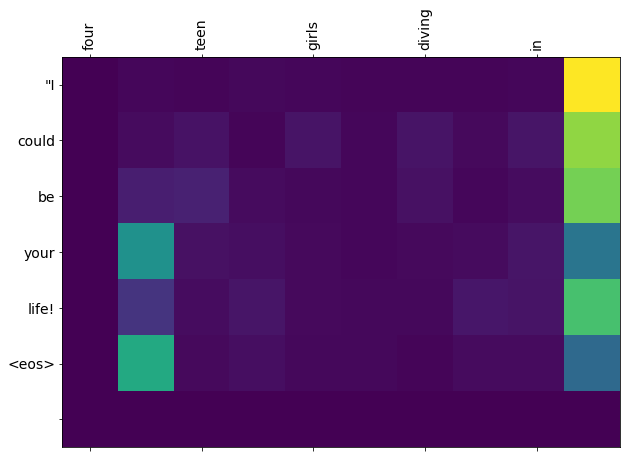

In [0]:
translate(sentence, encoder, decoder, source2idx, target2idx, s_max_len, t_max_len)

In [0]:
df[df['movie_tagline'].str.contains('Your Life')]

,movie_genre,movie_name,movie_poster,movie_summary,movie_synopsis,movie_tagline
80,"['Action', 'Comedy', 'Crime', 'Thriller']",Stuber,www.imdb.com/title/tt7734218/mediaviewer/rm293...,A detective recruits his Uber driver into an u...,The film starts with Detectives Vic Manning Da...,Prepare for the Rideshare of Your Life
909,"['Fantasy', 'Horror']",Wishmaster,www.imdb.com/title/tt0120524/mediaviewer/rm241...,A demonic djinn attempts to grant its owner th...,The narrator Angus Scrimm in his only words in...,"Beg For Your Life, Pray For Your Soul, But Wha..."


In [0]:
df

,movie_genre,movie_name,movie_poster,movie_summary,movie_synopsis,movie_tagline
0,"['Adventure', 'Drama', 'Horror', 'Thriller']",47 Meters Down: Uncaged,www.imdb.com/title/tt7329656/mediaviewer/rm242...,Four teen girls diving in a ruined underwater ...,The film starts at a girls school in Yucatan M...,The Next Chapter
1,"['Drama', 'Fantasy', 'Horror']",It Chapter Two,www.imdb.com/title/tt7349950/mediaviewer/rm324...,Twentyseven years after their first encounter ...,In 2016 Derry Maine a young gay man is beaten ...,You'll Float Again
2,"['Horror', 'Sci-Fi']",Alien,www.imdb.com/title/tt0078748/mediaviewer/rm299...,After a space merchant vessel perceives an unk...,The opening credits appear in front of a large...,"It's Alien, the 8th passenger."
3,"['Horror', 'Mystery', 'Thriller']",The Conjuring 3,www.imdb.com/title/tt7069210/mediaviewer/rm175...,,,
4,"['Adventure', 'Drama', 'Fantasy']",The Lord of the Rings: The Fellowship of the R...,www.imdb.com/title/tt0120737/mediaviewer/rm359...,A meek Hobbit from the Shire and eight compani...,The prologue spoken by Galadriel shows the Dar...,All we have to decide is what to do with the t...
5,"['Crime', 'Drama', 'Thriller']",The Mule,www.imdb.com/title/tt7959026/mediaviewer/rm320...,A 90yearold horticulturist and Korean War vete...,This movie is based on a true story of a World...,Nobody Runs Forever
6,"['Adventure', 'Family', 'Fantasy']",Harry Potter and the Sorcerer's Stone,www.imdb.com/title/tt0241527/mediaviewer/rm683...,An orphaned boy enrolls in a school of wizardr...,Lord Voldemort an evil and powerful dark wizar...,The Magic Begins November 16th.
7,"['Comedy', 'Family', 'Fantasy']",Hocus Pocus,www.imdb.com/title/tt0107120/mediaviewer/rm354...,A curious youngster moves to Salem where he st...,Hocus Pocus begins in a small town in 1693 wer...,It's just a bunch of Hocus Pocus!
8,"['Action', 'Adventure', 'Comedy', 'Fantasy']",Jumanji: Welcome to the Jungle,www.imdb.com/title/tt2283362/mediaviewer/rm193...,Four teenagers are sucked into a magical video...,In 1996 teenager Alex Vreeke receives the or...,Landing This Christmas.
9,"['Animation', 'Adventure', 'Comedy', 'Family']",Finding Nemo,www.imdb.com/title/tt0266543/mediaviewer/rm331...,After his son is captured in the Great Barrier...,Two clownfish Marlin and his wife Coral ad...,71% of the Earth's surface is covered by water...
